In [1]:
!wget https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/image_data.zip

--2020-06-25 07:58:40--  https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/image_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20160500 (19M) [application/zip]
Saving to: ‘image_data.zip’

image_data.zip      100%[===================>]  19.23M  29.1MB/s    in 0.7s    

2020-06-25 07:58:42 (29.1 MB/s) - ‘image_data.zip’ saved [20160500/20160500]



In [2]:
!unzip image_data.zip

Archive:  image_data.zip
  inflating: image_data/car3.png     
  inflating: image_data/cat.jpeg     
  inflating: image_data/cat2.jpg     
   creating: image_data/data/
   creating: image_data/data/dogs/
  inflating: image_data/data/dogs/dog.1.jpg  
  inflating: image_data/data/dogs/dog.10.jpg  
  inflating: image_data/data/dogs/dog.100.jpg  
  inflating: image_data/data/dogs/dog.101.jpg  
  inflating: image_data/data/dogs/dog.102.jpg  
  inflating: image_data/data/dogs/dog.103.jpg  
  inflating: image_data/data/dogs/dog.104.jpg  
  inflating: image_data/data/dogs/dog.105.jpg  
  inflating: image_data/data/dogs/dog.106.jpg  
  inflating: image_data/data/dogs/dog.107.jpg  
  inflating: image_data/data/dogs/dog.108.jpg  
  inflating: image_data/data/dogs/dog.109.jpg  
  inflating: image_data/data/dogs/dog.11.jpg  
  inflating: image_data/data/dogs/dog.110.jpg  
  inflating: image_data/data/dogs/dog.111.jpg  
  inflating: image_data/data/dogs/dog.112.jpg  
  inflating: image_data/data/dog

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as im
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras import models,layers
import os

# Dataset preparation

In [8]:
main_folder = 'image_data/data'
names = os.listdir(main_folder)
names

['horses', 'Humans', 'dogs']

In [10]:
x = [] # to store images
y = [] # to store labels

for folder in names:
  file_names = os.listdir(main_folder+"/"+folder)
  for img_name in file_names:
    path = main_folder+"/"+folder+"/"+img_name
    img = im.load_img(path,target_size=(250,250))
    img = im.img_to_array(img)
    x.append(img)
    y.append(names.index(folder))
    

In [11]:
x = np.array(x)
y = np.array(y)

In [13]:
y = to_categorical(y)
print(x.shape)
print(y.shape)

(606, 250, 250, 3)
(606, 3)


# Designing the CNN - Convolutional Neural Networks

In [31]:
layer1 = layers.Input(shape=(250,250,3))

# feature detection segment
# add the convolutional layer
layer2 = layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu')(layer1)
# add the maxpooling layer
layer3 = layers.MaxPooling2D(pool_size=(2,2))(layer2)
# add the convolutional layer
layer4 = layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu')(layer3)
layer4 = layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu')(layer4)
# add the maxpooling layer
layer5 = layers.MaxPooling2D(pool_size=(2,2))(layer4)
layerk = layers.Dropout(0.2)(layer5)
# add a flatten layer - to convert the matrix to array
layer6 = layers.Flatten()(layerk)

#classification - add fully connected layer - weighted sum + activation
#adding hidden layer
layer7 = layers.Dense(200,activation='relu')(layer6)
#adding the output layer
layer8 = layers.Dense(3,activation='softmax')(layer7)

model = models.Model(inputs=layer1,outputs=layer8)



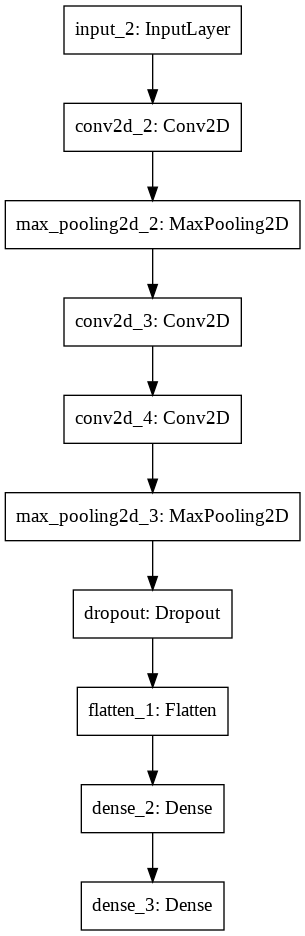

In [32]:
plot_model(model)

# Compile and Train the model

In [33]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [35]:
#train the model
model.fit(xtrain,ytrain,epochs=20,batch_size=32,validation_data=(xtest,ytest))

Epoch 1/20
16/16 [==============================] - 2s 94ms/step - loss: 763.8771 - accuracy: 0.3926 - val_loss: 109.7448 - val_accuracy: 0.3934
Epoch 2/20
16/16 [==============================] - 1s 77ms/step - loss: 14.6897 - accuracy: 0.4050 - val_loss: 1.0984 - val_accuracy: 0.3525
Epoch 3/20
16/16 [==============================] - 1s 76ms/step - loss: 1.9989 - accuracy: 0.3347 - val_loss: 1.0984 - val_accuracy: 0.3525
Epoch 4/20
16/16 [==============================] - 1s 75ms/step - loss: 1.0942 - accuracy: 0.3326 - val_loss: 1.0984 - val_accuracy: 0.3525
Epoch 5/20
16/16 [==============================] - 1s 75ms/step - loss: 1.0942 - accuracy: 0.3326 - val_loss: 1.0985 - val_accuracy: 0.3525
Epoch 6/20
16/16 [==============================] - 1s 75ms/step - loss: 1.0942 - accuracy: 0.3326 - val_loss: 1.0985 - val_accuracy: 0.3525
Epoch 7/20
16/16 [==============================] - 1s 75ms/step - loss: 1.0941 - accuracy: 0.3326 - val_loss: 1.0985 - val_accuracy: 0.3525
Epoch 8/

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 248, 248, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 16)      1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 59536)             0         
_________________________________________________________________
dense (Dense)                (None, 200)               119074

In [21]:
ypred = model.predict(xtest)
ypred2 = np.array([np.argmax(k) for k in ypred])
ypred2

array([2, 2, 2, 2, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 0, 2, 1, 2, 2, 0, 0, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1,
       1, 0, 0, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 0, 0, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 1, 2,
       1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1])

In [23]:
ytest2 = np.array([np.argmax(k) for k in ytest])

In [25]:
from sklearn import metrics
cm = metrics.confusion_matrix(ytest2,ypred2)

In [26]:
import pandas as pd
pd.DataFrame(cm,index=names,columns=names)

,horses,Humans,dogs
horses,25,6,7
Humans,1,35,5
dogs,11,9,23


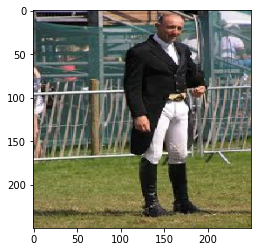

In [28]:
img = xtest[0]
plt.imshow(img.astype('int32'))

In [29]:
model.predict(img.reshape(1,250,250,3))

array([[3.8100471e-11, 1.6386563e-01, 8.3613443e-01]], dtype=float32)

In [30]:
names

['horses', 'Humans', 'dogs']

In [36]:
model.save("model.h5")